<a href="https://colab.research.google.com/github/iubordei/Ahorcado/blob/master/Optimizacion_Hiperparametros_Clasificadores_Escalado_Extraccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimización de hiperparámetros para los clasificadores. Escalado de datos y extracción de descriptores.**

### **Descargar e importar dataset.**

In [1]:
# Descargar dataset.
!wget https://www.dropbox.com/s/lw2b4duiimsgnks/train.csv?dl=1 -O train.csv

--2021-04-12 08:03:45--  https://www.dropbox.com/s/lw2b4duiimsgnks/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/lw2b4duiimsgnks/train.csv [following]
--2021-04-12 08:03:45--  https://www.dropbox.com/s/dl/lw2b4duiimsgnks/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7ef49718463a4e4b33214ece55.dl.dropboxusercontent.com/cd/0/get/BMfdmWslKY6j5krFfpQDDjOME2xIyovl-cXw4sB-29Jq3tAWZrTqjx0cnQSiksd_ZNhLYbo6psYRfXnFzaRPJHSOmj6jdDww7_IK_Dzqj6uPF0OMupcWMLthDfNPvbl79ai59phaltCGeByDKUar0P0x/file?dl=1# [following]
--2021-04-12 08:03:45--  https://uc7ef49718463a4e4b33214ece55.dl.dropboxusercontent.com/cd/0/get/BMfdmWslKY6j5krFfpQDDjOME2xIyovl-cXw4sB-29Jq3tAWZrTqjx0cnQSiksd_ZNhLYbo6psYRfXnFzaRPJHSOmj6jdDww7

In [2]:
# Importar librería pandas.
import pandas as pd
# Cargar dataset de pacientes en un DataFrame.
df = pd.read_csv('train.csv')
df.head()

,SL,EEG,BP,HR,CIRCULATION,ACTIVITY
0,4019.64,-1600.00,13,79,317,3
1,2191.03,-1146.08,20,54,165,2
2,2787.99,-1263.38,46,67,224,2
3,9545.98,-2848.93,26,138,554,4
4,14148.80,-2381.15,85,120,809,4


### **Preparar dataset de entrenamiento.**

In [3]:
# Separar los descriptores (X) de las etiquetas (Y).
X = df.values[:, 0:-1]
Y = df.values[:, -1:]

In [4]:
# Importar librería para separar dataset.
from sklearn.model_selection import train_test_split

In [5]:
# Dividir el conjunto original de entrenamiento en dos, uno de entrenamiento y otro de test.
(trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [6]:
# Dividir el nuevo conjunto de entrenamiento en dos, uno de entrenamiento y otro de validación.
(trainData, validationData, trainLabels, validationLabels) = train_test_split(trainData, trainLabels, test_size = 0.2, random_state = 42)

### **Clasificadores.**

In [15]:
# Suprimir la salida de warnings por pantalla.
import warnings
warnings.simplefilter('ignore')

In [16]:
# Importar los distintos clasificadores.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

#### **Holdout validation.**

##### **KNN.**

In [20]:
# Probar disitintos valores del hiperparámetro k para buscar el mejor rendimiento.
for k in range(1, 26, 2):
    modelKNN = KNeighborsClassifier(n_neighbors = k)
    modelKNN.fit(trainData, trainLabels)
    score = modelKNN.score(validationData, validationLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=1, precisión=59.11%
k=3, precisión=59.95%
k=5, precisión=60.10%
k=7, precisión=60.62%
k=9, precisión=60.47%
k=11, precisión=60.10%
k=13, precisión=59.84%
k=15, precisión=59.17%
k=17, precisión=58.54%
k=19, precisión=58.44%
k=21, precisión=57.81%
k=23, precisión=57.60%
k=25, precisión=57.29%


- k = 7 produce el mejor resultado.

##### **Árboles de decisión.**

In [18]:
# Probar disitintos valores del hiperparámetro min_samples_split para buscar el mejor rendimiento.
for k in range(2, 10, 1):
    modelArbol = DecisionTreeClassifier(random_state = 84, min_samples_split = k)
    modelArbol.fit(trainData, trainLabels)
    score = modelArbol.score(validationData, validationLabels)
    print("min_samples_split=%d, precisión=%.2f%%" % (k, score * 100))

min_samples_split=2, precisión=67.66%
min_samples_split=3, precisión=67.76%
min_samples_split=4, precisión=67.08%
min_samples_split=5, precisión=66.93%
min_samples_split=6, precisión=66.72%
min_samples_split=7, precisión=67.08%
min_samples_split=8, precisión=66.98%
min_samples_split=9, precisión=67.03%


- min_samples_split = 3 produce el mejor resultado.

##### **Regresión logística.**

In [19]:
valores = [0.1, 1, 10, 100, 1000]
for c in valores:
    modelLR = LogisticRegression(random_state = 84, C = c)
    modelLR.fit(trainData, trainLabels)
    score = modelLR.score(validationData, validationLabels)
    print("c=%d, precisión=%.2f%%" % (c, score * 100))

c=0, precisión=29.22%
c=1, precisión=30.05%
c=10, precisión=29.38%
c=100, precisión=29.48%
c=1000, precisión=29.43%


- C = 1 produce el mejor resultado.

#### **K-fold validation.**

Hacer la separación entre entrenamiento y validación de manera no manual.

In [21]:
# Recuperar el conjunto de entrenamiento original, formado por el de entrenamiento y el de validación.
import numpy as np
trainData = np.concatenate((trainData, validationData), axis = 0)
trainLabels = np.concatenate((trainLabels, validationLabels), axis = 0)

##### **KNN.**

In [22]:
from sklearn.model_selection import cross_val_score

for k in range(1, 26, 2):
    modelKNN = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(modelKNN, trainData, trainLabels, cv = 10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.60 (+/- 0.02)
k=3, Precisión: 0.60 (+/- 0.02)
k=5, Precisión: 0.61 (+/- 0.02)
k=7, Precisión: 0.61 (+/- 0.01)
k=9, Precisión: 0.60 (+/- 0.02)
k=11, Precisión: 0.60 (+/- 0.02)
k=13, Precisión: 0.60 (+/- 0.02)
k=15, Precisión: 0.60 (+/- 0.02)
k=17, Precisión: 0.59 (+/- 0.02)
k=19, Precisión: 0.59 (+/- 0.02)
k=21, Precisión: 0.58 (+/- 0.03)
k=23, Precisión: 0.58 (+/- 0.02)
k=25, Precisión: 0.57 (+/- 0.02)


- k = 7 sigue produciendo el mejor resultado.

##### **SVM.**

Para SVM se va a combinar k-fold cross validation con RandomGridSearch

In [23]:
# Crear clasificador,
modelSVM = SVC(kernel = 'sigmoid')

In [25]:
# Función RandomGridSearch.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def randomsearch(model, parameters):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(model, parameters, cv = 5)
    clf.fit(trainData, trainLabels)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()

In [27]:
# Ejecutar RandomGridSearch para encontrar el mejor gamma y C.
randomsearch(modelSVM, {'gamma': sp_randint(2, 20), 'C': sp_randint(0.1, 100)})

# Tuning hyper-parameters for 0.5729166666666666

Best parameters set found on development set:

{'C': 1, 'gamma': 7}



- C = 1
- gamma = 7

##### **Redes neuronales.**

In [28]:
# Crear una red neuronal.
modelMultiLayerPerceptron = MLPClassifier()

In [29]:
# Ejecutar RandomGridSearch para encontrar el mejor hidden_layer_sizes, activation, momentun y learning_rate.
randomsearch(modelMultiLayerPerceptron, {'hidden_layer_sizes': [(5, 2), (3, 3, 3), (5, 3, 2), (5, 4, 3, 2)],
                                         'activation': ['identity', 'logistic', 'tanh', 'relu'],
                                         'momentum': [0.9, 0.95, 0.99],
                                         'learning_rate_init': [0.001, 0.01, 0.1]})

# Tuning hyper-parameters for 0.5729166666666666

Best parameters set found on development set:

{'momentum': 0.99, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'tanh'}



- momentum = 0.99
- learning_rate_init = 0.001
- hidden_layer_sizes = (3, 3, 3)
- activation = 'tanh'

#### **Evaluación de clasificadores.**

#####Crear clasificadores con los hiperparámetros encontrados.

In [30]:
# KNN.
modelKNN = KNeighborsClassifier(n_neighbors = 7)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [31]:
# Árboles de decisión.
modelArbol = DecisionTreeClassifier(random_state = 84, min_samples_split = 3)
modelArbol.fit(trainData, trainLabels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=84, splitter='best')

In [32]:
# Regresión logística.
modelLR = LogisticRegression(random_state = 84, C = 1)
modelLR.fit(trainData, trainLabels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=84, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# SVM.
modelSVM = SVC(kernel = 'sigmoid', gamma = 7, C = 1)
modelSVM.fit(trainData, trainLabels)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=7, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
# Redes neuronales.
modelMultiLayerPerceptron = MLPClassifier(momentum=0.99, activation='tanh', learning_rate_init=0.001, hidden_layer_sizes=(3, 3, 3))
modelMultiLayerPerceptron.fit(trainData, trainLabels)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.99, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

##### Evaluación de los clasificadores.

In [35]:
# Importar informe de rendimiento del clasificador.
from sklearn.metrics import classification_report

In [36]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNN.predict(testData)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73       695
         1.0       0.54      0.69      0.60        77
         2.0       0.55      0.63      0.59       346
         3.0       0.50      0.61      0.55       498
         4.0       0.59      0.53      0.56       541
         5.0       0.48      0.41      0.44       243

    accuracy                           0.60      2400
   macro avg       0.57      0.59      0.58      2400
weighted avg       0.61      0.60      0.60      2400



In [37]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO ÁRBOLES DE DECISIÓN")
predictionsArbol = modelArbol.predict(testData)
print(classification_report(testLabels, predictionsArbol))

EVALUACIÓN EN CONJUNTO DE TEST USANDO ÁRBOLES DE DECISIÓN
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       695
         1.0       0.64      0.77      0.70        77
         2.0       0.61      0.64      0.63       346
         3.0       0.55      0.59      0.57       498
         4.0       0.59      0.58      0.59       541
         5.0       0.55      0.50      0.52       243

    accuracy                           0.67      2400
   macro avg       0.64      0.66      0.65      2400
weighted avg       0.67      0.67      0.67      2400



In [38]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO REGRESIÓN LOGÍSTICA")
predictionsLR = modelLR.predict(testData)
print(classification_report(testLabels, predictionsLR))

EVALUACIÓN EN CONJUNTO DE TEST USANDO REGRESIÓN LOGÍSTICA
              precision    recall  f1-score   support

         0.0       0.31      0.92      0.47       695
         1.0       0.00      0.00      0.00        77
         2.0       0.50      0.08      0.13       346
         3.0       0.00      0.00      0.00       498
         4.0       0.32      0.18      0.23       541
         5.0       0.17      0.00      0.01       243

    accuracy                           0.32      2400
   macro avg       0.22      0.20      0.14      2400
weighted avg       0.25      0.32      0.21      2400



In [39]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO SVM")
predictionsSVM = modelSVM.predict(testData)
print(classification_report(testLabels, predictionsSVM))

EVALUACIÓN EN CONJUNTO DE TEST USANDO SVM
              precision    recall  f1-score   support

         0.0       0.29      1.00      0.45       695
         1.0       0.00      0.00      0.00        77
         2.0       0.00      0.00      0.00       346
         3.0       0.00      0.00      0.00       498
         4.0       0.00      0.00      0.00       541
         5.0       0.00      0.00      0.00       243

    accuracy                           0.29      2400
   macro avg       0.05      0.17      0.07      2400
weighted avg       0.08      0.29      0.13      2400



In [40]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO REDES NEURONALES")
predictionsMultiLayerPerceptron = modelMultiLayerPerceptron.predict(testData)
print(classification_report(testLabels, predictionsMultiLayerPerceptron))

EVALUACIÓN EN CONJUNTO DE TEST USANDO REDES NEURONALES
              precision    recall  f1-score   support

         0.0       0.29      0.96      0.45       695
         1.0       0.00      0.00      0.00        77
         2.0       0.29      0.11      0.16       346
         3.0       0.00      0.00      0.00       498
         4.0       0.40      0.00      0.01       541
         5.0       0.00      0.00      0.00       243

    accuracy                           0.29      2400
   macro avg       0.16      0.18      0.10      2400
weighted avg       0.22      0.29      0.15      2400



- Mejor precisión: Árboles de decisión, 67%.
- Mejor recall: Árboles de decisión, 67%.
- Mejor f-score: Árboles de decisión, 67%.

#### **Estudio estadístico.**

In [51]:
# Instalar módulo StatisticalAnalysis para tener acceso a la función compare_methods().
!pip install StatisticalAnalysis

  Created wheel for StatisticalAnalysis: filename=StatisticalAnalysis-0.0.5-py2.py3-none-any.whl size=13106 sha256=5af97ccb736853c4cb2fdeae5de64f5eb4965a978c4b10af03cb556413b5cbc7
  Stored in directory: /root/.cache/pip/wheels/08/25/c2/06c9fdf3fc87bad4738237bc3318b20a7971189d5399f26ef7
Successfully built StatisticalAnalysis


In [52]:
# Importar compare_methods() para llevar a cabo estudio estadístico.
from StatisticalAnalysis import compare_methods

In [53]:
# Definir modelos y parámetros a optimizar.
#
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state = 84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf', 'sigmoid'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors': sp_randint(3, 30)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1, 0.5, 1, 10, 100, 1000]}
# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5, 2), (3, 3, 3), (5, 3, 2), (5, 4, 3, 2)],
                 'momentum': [0.9, 0.95, 0.99], 'learning_rate_init': [0.001, 0.01, 0.1]}

In [54]:
# Lista con algoritmos.
listAlgorithms = [clfTree, clfSVC, clfKNN, clfLR, clfMLP]

In [55]:
# Lista con parámetros a optimizar.
listParams = [param_distTree, param_distSVC, param_distKNN, param_distLR, param_distMLP]

In [56]:
# Lista con los nombres de los algoritmos.
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.681640 (0.008244)
SVM: 0.554212 (0.015871)
KNN: 0.607633 (0.013861)
LR: 0.307025 (0.016507)
MLP: 0.306940 (0.020960)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.826794, p:0.000004
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.529368, p:0.209804
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfilled, applying a non-parametric test
-----------------------

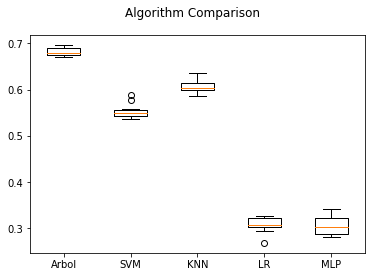

In [59]:
compare_methods(X, Y, listAlgorithms, listParams, listNames, metric = 'accuracy')

Se ha ejecutado un test no paramétrico (test de Friedman), ya que no se cumplen las condiciones de parametricidad (independencia, normalidad y heterocedasticidad).

La hipótesis nula se rechaza, esto significa que existe diferencia entre el rendimiento de los distintos modelos.

El informe determina que el mejor modelo es el proporcionado por el árbol de decisión.

### **Escalado de datos.**

Los modelos suelen aprender mejor cuando todos los descriptores están en la misma escala.

#### **Normalizar.**

Reescalar los descriptores en el rango [0,1].

In [60]:
# Importar y crear herramienta de normalizado de descriptores.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [61]:
# Normalizar.
X_train_norm = mms.fit_transform(trainData)
X_test_norm = mms.transform(testData)

#### **Estandarizar.**

Centrar las columnas de descriptores con media 0 y desviación típica 1, de modo que los descriptores toman forma de una distribución normal (hace que los pesos se aprendan más fácilmente).

In [62]:
# Importar y crear herramienta para estandarizar.
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [63]:
# Estandarizar.
X_train_std = stdsc.fit_transform(trainData)
X_test_std = stdsc.transform(testData)

#### **Evaluación de los nuevos conjuntos de entrenamiento.**

###### Conjunto de entrenamiento normalizado.

In [65]:
arbol_norm = DecisionTreeClassifier(random_state = 84, min_samples_split = 3)
arbol_norm.fit(X_train_norm, trainLabels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=84, splitter='best')

In [69]:
score = arbol_norm.score(X_test_norm, testLabels)
print("Precisión = %.2f%%" % (score * 100))

Precisión = 67.25%


###### Conjunto de entrenamiento estandarizado.

In [71]:
arbol_std = DecisionTreeClassifier(random_state = 84, min_samples_split = 3)
arbol_std.fit(X_train_std, trainLabels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=84, splitter='best')

In [72]:
score = arbol_std.score(X_test_std, testLabels)
print("Precisión = %.2f%%" % (score * 100))

Precisión = 67.67%


###### Conjunto de entrenamiento original

In [74]:
arbol_og = DecisionTreeClassifier(random_state = 84, min_samples_split = 3)
arbol_og.fit(trainData, trainLabels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=84, splitter='best')

In [75]:
score = arbol_og.score(testData, testLabels)
print("Precisión = %.2f%%" % (score * 100))

Precisión = 66.88%


### **Selección de descriptores relevantes.**

In [77]:
# Importar librerías.
!wget https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py -O sbs.py
import matplotlib.pyplot as plt
from sbs import SBS
%matplotlib inline

--2021-04-12 14:37:59--  https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691 (1.7K) [text/plain]
Saving to: ‘sbs.py’

sbs.py              100%[===================>]   1.65K  --.-KB/s    in 0s      

2021-04-12 14:38:00 (28.6 MB/s) - ‘sbs.py’ saved [1691/1691]



In [78]:
# Crear un clasificador y un selector de descriptores (mínimo tiene que tomar 1).
arbol_desc = DecisionTreeClassifier(random_state = 84, min_samples_split = 3)
sbs = SBS(arbol_desc, k_features=1)
sbs.fit(X_train_std, trainLabels)

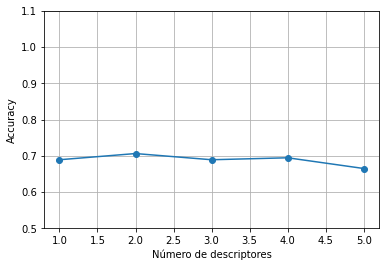

In [80]:
# Mostrar gráficamente los subconjuntos que ofrecen el mejor rendimiento.
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.5, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Número de descriptores')
plt.grid()
plt.show()

In [87]:
# Extraer los 2 descriptores más relevantes (resultado obtenido del gráfico anterior).
desc = list(sbs.subsets_[sbs.scores_.index(max(sbs.scores_))])
print(desc[0], ':', df.columns[desc[0]])
print(desc[1], ':', df.columns[desc[1]])

3 : HR
4 : CIRCULATION


In [90]:
# Creación y entrenamiento del modelo final.
arbol_fin = DecisionTreeClassifier(random_state = 84, min_samples_split = 3)
arbol_fin.fit(X_train_std[:, desc], trainLabels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=84, splitter='best')

In [95]:
# Evaluación del modelo final.
print("Training accuracy = %.2f%%" % (arbol_fin.score(X_train_std[:, desc], trainLabels) * 100))
print("Test accuracy = %.2f%%" % (arbol_fin.score(X_test_std[:, desc], testLabels) * 100))

Training accuracy = 73.34%
Test accuracy = 70.88%
